In [2]:
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.models import *
lm.models.RECORD_DIR='../models/records'



/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from IPython.lib import deepreload
deepreload.reload(lf)
deepreload.reload(lm)
deepreload.reload(lv)


Reloading zmq
Reloading src
Reloading os
Reloading src.models
Reloading src.features
Reloading src.visualization
Reloading src
Reloading abc
Reloading src.models
Reloading src.features
Reloading src.visualization
Reloading src
Reloading stat
Reloading src.models
Reloading src.features
Reloading _collections_abc
Reloading src.visualization


<module 'src.visualization' from '/Users/olivier/AU23_Plantes/src/visualization/__init__.py'>


Data loading
---------

In [4]:
#### Data building
data = lf.data_builder.create_dataset_from_directory('../data/v2-plant-seedlings-dataset/')


Model Loading
---------

In [5]:

#### Train Campaigns
campaign_id='test'

#### Stage 1
stage1_mobilenet = Stage1MobileNetv3(data)
stage1_mobilenet.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_MobileNetv3 –– Loading


In [6]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_evaluation(img.path)}")
print(f"Actual : {img.label}")

>>> Stage-1_MobileNetv3 –– Evaluation


2023-10-27 10:31:13.932056: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 336ms/step
Pred : Cleavers
Actual : Cleavers


In [7]:
results = stage1_mobilenet.evaluate()
display(results)

>>> Stage-1_MobileNetv3 –– Evaluation
18/18 [==============================] - 6s 297ms/step


,filename,actual,predicted,Same
0,../data/v2-plant-seedlings-dataset/Shepherd’s ...,Shepherd’s Purse,Small-flowered Cranesbill,False
1,../data/v2-plant-seedlings-dataset/Charlock/21...,Charlock,Charlock,True
2,../data/v2-plant-seedlings-dataset/Sugar beet/...,Sugar beet,Sugar beet,True
3,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Scentless Mayweed,True
4,../data/v2-plant-seedlings-dataset/Cleavers/10...,Cleavers,Cleavers,True
...,...,...,...,...
549,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Shepherd’s Purse,False
550,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
551,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Common Chickweed,False
552,../data/v2-plant-seedlings-dataset/Loose Silky...,Loose Silky-bent,Black-grass,False


>>> Stage-1_MobileNetv3 –– Display training data samples


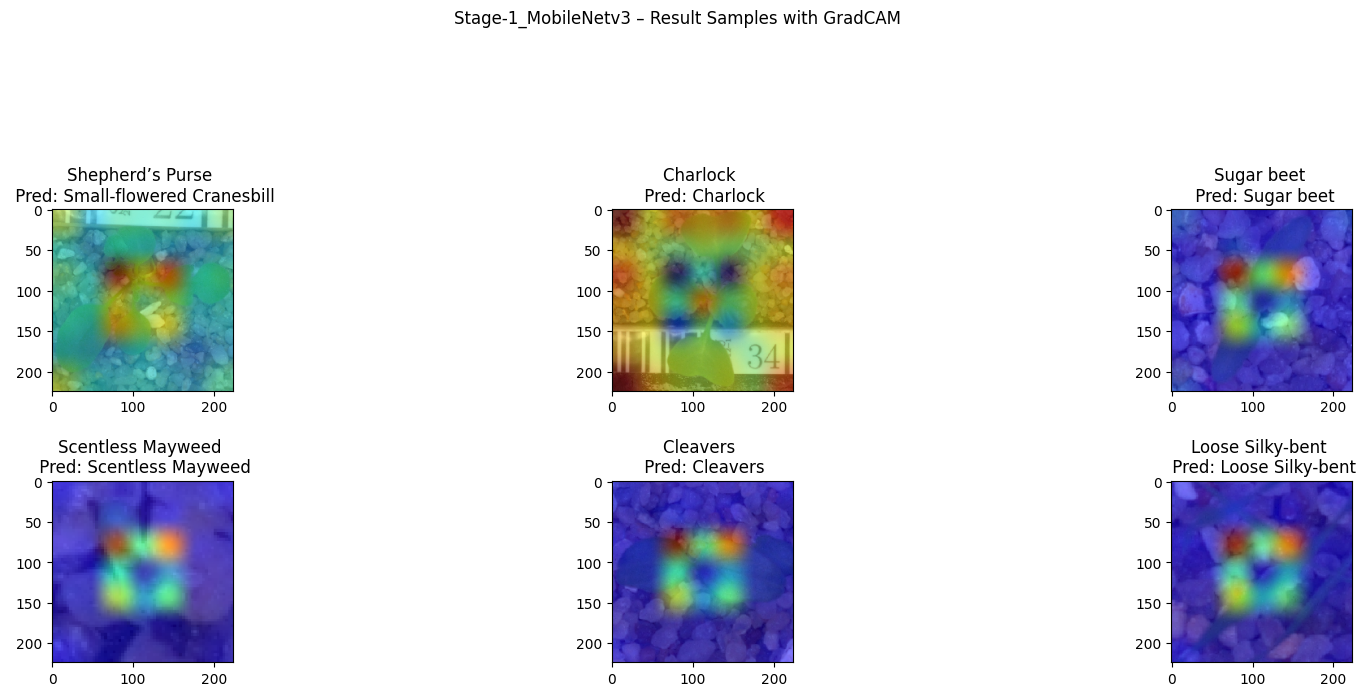

In [8]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)